In [1]:
# Packages for analysis


import pandas as pd

import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [4]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('Iris.csv')
recipes.drop(recipes[recipes["Species"] == "Iris-virginica"].index, inplace=True)


recipes=recipes.sample(n = 19)
recipes


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,31,4.8,3.1,1.6,0.2,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
49,50,5.0,3.3,1.4,0.2,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


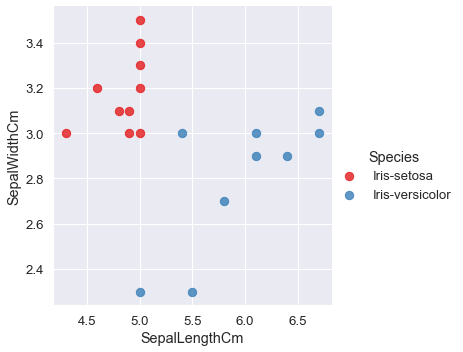

In [5]:
# Plot two ingredients
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=recipes, hue='Species',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [6]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['SepalLengthCm','SepalWidthCm']].to_numpy()
type_label = np.where(recipes['Species']=="Iris-versicolor", 0, 1)
print(np.unique(type_label))

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

[0 1]


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [7]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

print("SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)")

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)


### Buradaki C degeri = 1.0 basit bir sekilde oncelik ver 13:38
#### residual az olsa da olur
![](https://images2.imgbox.com/84/6a/wIwld3oX_o.png)

In [8]:
model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(ingredients, type_label)

SVC(kernel='linear')

### Kernel trick: 
#### Verinin boyutu lineer veya RBF
![](https://images2.imgbox.com/6f/56/nAO1raPE_o.png)

In [9]:

model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

### ikili class olarak fit ediyoruz

![](https://images2.imgbox.com/ef/cd/sCOCCBg7_o.png)

In [10]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 7)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


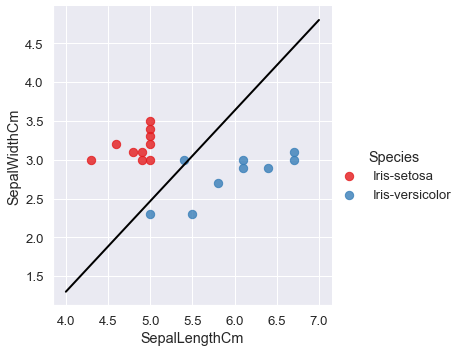

In [11]:
# Plot the hyperplane
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=recipes, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


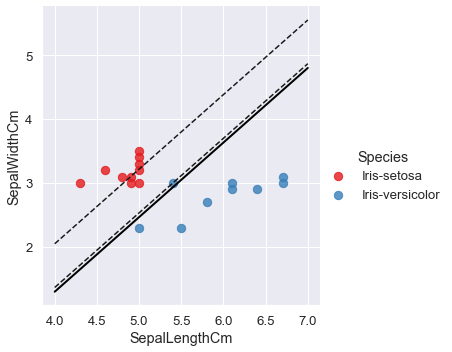

In [12]:
# Look at the margins and support vectors
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=recipes, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [13]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake( SepalLengthCm, SepalWidthCm):
    if(model.predict([[SepalLengthCm, SepalWidthCm]]))==0:
        print('You\'re looking at a Iris-versicolor')
    else:
        print('You\'re looking at a Iris-setosa')

In [14]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(4.9, 3.1)

You're looking at a Iris-setosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


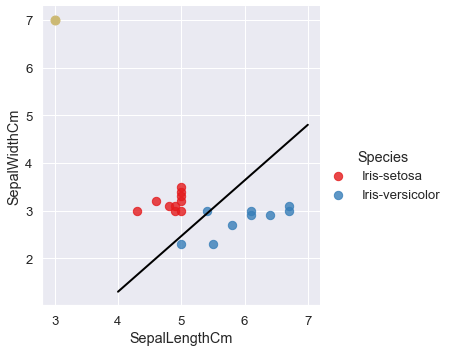

In [15]:
# Plot the point to visually see where the point lies
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=recipes, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(3, 7, 'yo', markersize='9');